# Imports

In [1]:
import sys
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

# Our code
from generate_prediction import load_dataset, features_expert

# Constants

In [2]:
train_path = "../data/normalized_train.csv"

# Loading data

In [3]:
features = features_expert()
X, y = load_dataset(train_path, training=True, features=features)

# PCA

In [4]:
df_data = pd.read_csv(train_path)

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, df_data[['label']]], axis = 1)

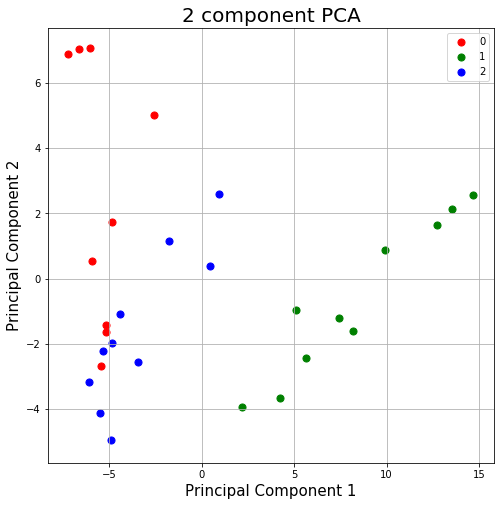

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep,   'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# KNN

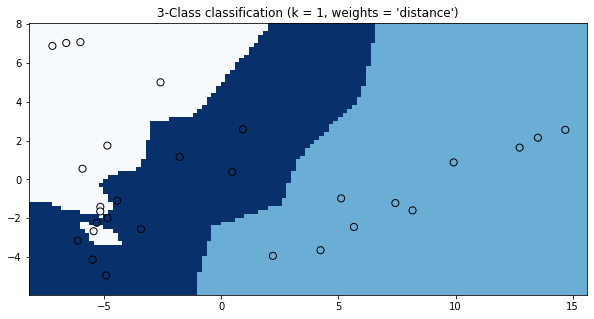

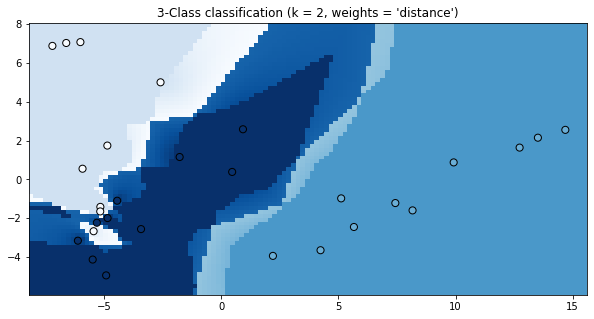

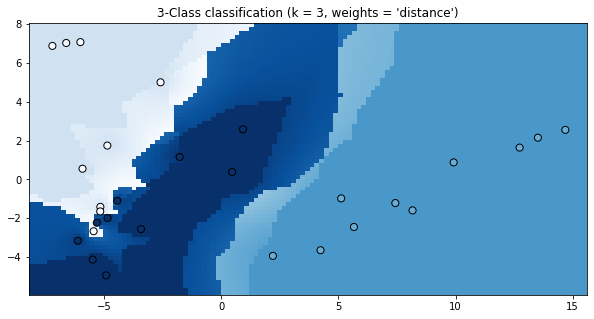

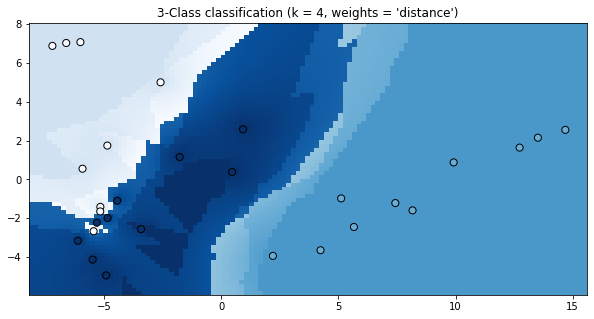

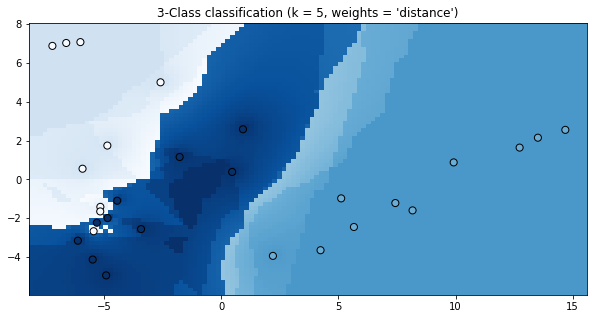

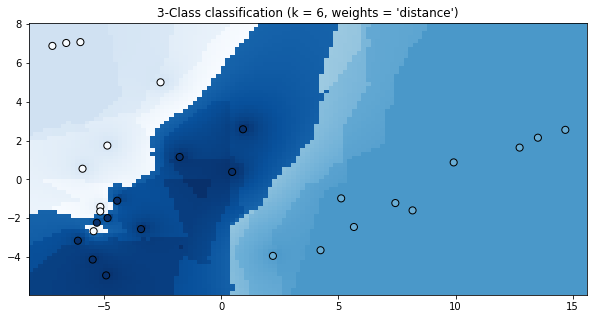

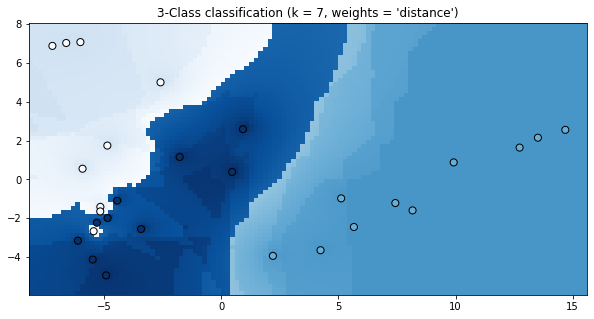

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


X = finalDf[finalDf.columns.difference(["label"])].values
y = finalDf["label"]

h= 0.2

# Create color maps
cmap_light = ListedColormap(['C3', 'C2', 'C0'])
cmap_bold  = ListedColormap(['r', 'g', 'b'])

for num_NN in range(1, 8):
    # Training
    weights="distance"
    clf = neighbors.KNeighborsClassifier(num_NN, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    

    # Inference
    mesh_predict = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    mesh_labels = np.argmax(mesh_predict, axis=1)
    mesh_proba = mesh_predict[np.arange(len(mesh_predict)), mesh_labels]

    mesh_labels = mesh_labels.reshape(xx.shape)
    mesh_proba = mesh_proba.reshape(xx.shape)

    # Put the result into a color plot
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(xx, yy, mesh_labels+mesh_proba, cmap=cm.Blues)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.Blues,
                edgecolor='k', s=50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (num_NN, weights))

    plt.show()

# Accuracy calculation

Performs KFold for each differents PCA dimensions.

In [9]:
X, y = load_dataset(train_path, training=True, features=features)

In [10]:
num_splits = 5

In [11]:
# Dic for results
dic_results = {}

for n_components in range(2, 20):
    #print("\nNum components", n_components)
    for K in range(1, 10):
        kf = KFold(n_splits=num_splits)
        acc_tot = 0.0
        for train_index, test_index in kf.split(X):
            # Split train test
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            

            # PCA on train
            pca = PCA(n_components=n_components)
            pcs_train = pca.fit_transform(X_train)
            pcs_test = pca.transform(X_test)

            # Clf KNN
            clf = neighbors.KNeighborsClassifier(K, weights="distance")
            clf.fit(pcs_train, y_train)

            # Make predictions
            y_preds = clf.predict(pcs_test)
            acc_tot += accuracy_score(y_test, y_preds)

        acc = acc_tot / num_splits
        #print("K={} | Accuracy={}".format(K, acc))
        
        if not K in dic_results:
            dic_results[K] = {"n_components":n_components, "accuracy":acc}
        elif dic_results[K]["accuracy"] < acc:
            dic_results[K] = {"n_components":n_components, "accuracy":acc}

for key, val in dic_results.items():
    print("K={} | {}".format(key, val))

K=1 | {'n_components': 9, 'accuracy': 0.82}
K=2 | {'n_components': 9, 'accuracy': 0.82}
K=3 | {'n_components': 17, 'accuracy': 0.6466666666666667}
K=4 | {'n_components': 8, 'accuracy': 0.68}
K=5 | {'n_components': 6, 'accuracy': 0.5933333333333334}
K=6 | {'n_components': 5, 'accuracy': 0.62}
K=7 | {'n_components': 5, 'accuracy': 0.5533333333333333}
K=8 | {'n_components': 14, 'accuracy': 0.62}
K=9 | {'n_components': 5, 'accuracy': 0.5533333333333333}
